# Task 1: Linear Regression and Polynomial Regression

In [15]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [16]:
#loading the dataset with panda
syield = pd.read_csv('syield.csv')   
syield.head()
print('Dimension of the syield dataset:',syield.ndim)    #checking the number of dimension of the dataset to ensure it is in 2D


#Separating feature(independent) and target(dependent) variable
x = syield[['DOY']].values          #feature variable 
y = syield[['Yield']].values        #target variable 

#Splitting the dataset for training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)   #splitting the dataset into 70:30 ratio where 70% of the dataset will be used for training and the remaining 30% will be used for testing

Dimension of the syield dataset: 2


### 1.1 Linear Regression

In [7]:
#Linear Regression
lin_reg = linear_model.LinearRegression()    #initializing linear regression model
lin_reg.fit(x_train,y_train)                 #training the model using train dataset

#Making prediction based on test feature dataset(x_test)
predicted_y = lin_reg.predict(x_test)    

#Calculating Root Mean Squared Error(RMSE) 
def RMSE_calc(y, predicted_y):
     MSE = np.mean((y-predicted_y)**2) 
     RMSE = np.sqrt(MSE)
     return RMSE

#Calculating R-squared 
def Rsquared(y, predicted_y):
    rss = np.sum((y - predicted_y)**2)    #calculating Residual Sum Sqaured (RSS)
    tss = np.sum((y - np.mean(y))**2)     #calculating Total Sum Squared(TSS)
    R2 = 1 - (rss/tss)
    return R2

#Calculating Mean Absolute Error(MAE) 
def MAE_calc(y, predicted_y):
    MAE = np.mean(np.abs(y - predicted_y))
    return MAE

rmse_value = RMSE_calc(y_test,predicted_y)
r2_value = Rsquared(y_test,predicted_y)
mae_value = MAE_calc(y_test,predicted_y)

print("Linear Regression: R-squared =",  r2_value)
print("Linear Regression: RMSE =", rmse_value)
print("Linear Regression: MAE =", mae_value)

Linear Regression: R-squared = 0.1851850819099703
Linear Regression: RMSE = 7.487313509307912
Linear Regression: MAE = 5.610152412897823


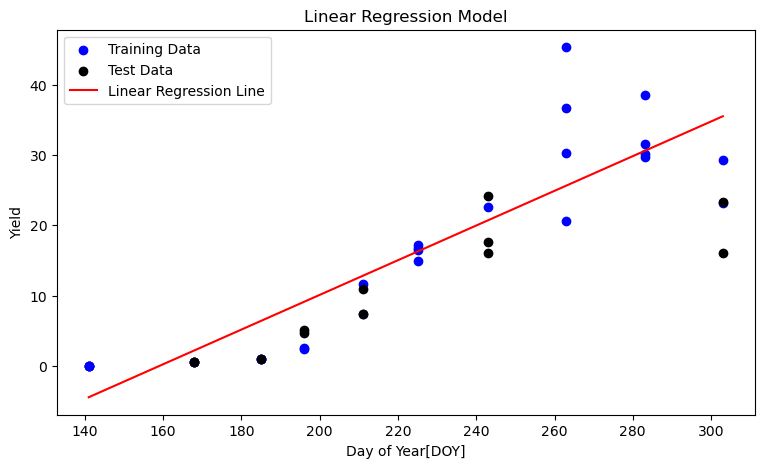

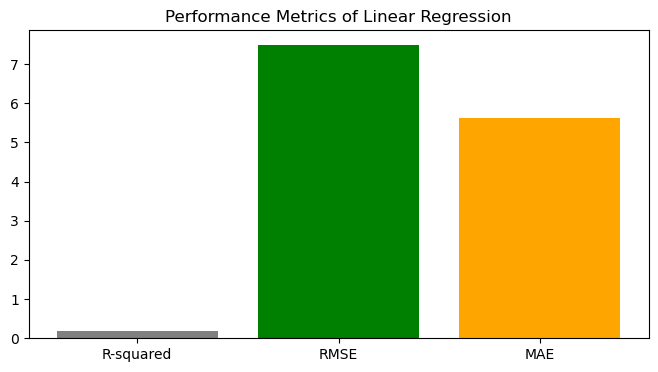

In [9]:
#Visualizing Linear Regression Model Fit
figure, ax = plt.subplots(figsize=(9,5))
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_range = lin_reg.predict(x_range)
ax.scatter(x_train, y_train, color='blue', label='Training Data')       #plotting training data to see the overall fit/trend in the dataset
ax.scatter(x_test, y_test, color='black', label='Test Data')            #plotting test data to see how well the model can generalise on new, unseen data
ax.plot(x_range, y_range, color='red', label='Linear Regression Line')  #plotting linear regression line
ax.set_xlabel('Day of Year[DOY]')
ax.set_ylabel('Yield')
ax.set_title('Linear Regression Model')
ax.legend()
plt.show()

#Visualizing the metrics used to evaluate model performance using bar graph
model_metrics = ['R-squared', 'RMSE', 'MAE']
metric_values = [r2_value, rmse_value, mae_value]
figure, ax = plt.subplots(figsize=(8,4))
ax.bar(model_metrics, metric_values, color=['gray','green','orange'])
ax.set_title('Performance Metrics of Linear Regression')
plt.show()

### 1.2  Polynomial Regression 

Polynomial Regreesion Degree: 2
Polynomial Regression: R-squared: 0.13721442744124845
Polynomial Regression: RMSE: 7.704562270136356
Polynomial Regression: MAE: 5.541645364209409


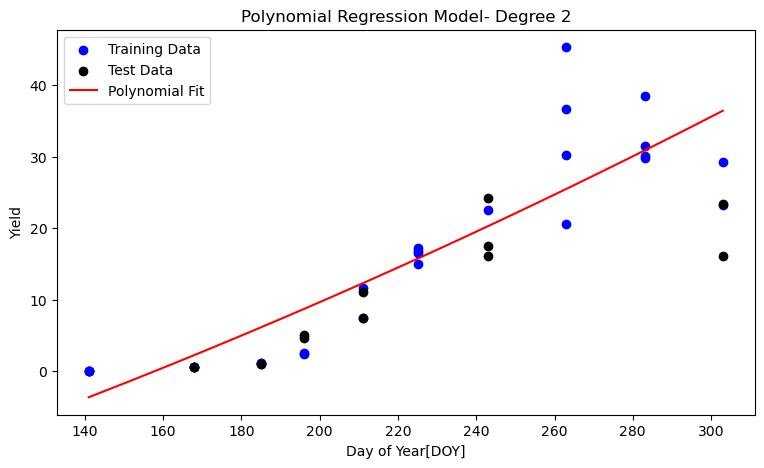

Polynomial Regreesion Degree: 3
Polynomial Regression: R-squared: 0.6286784764909872
Polynomial Regression: RMSE: 5.054423110416759
Polynomial Regression: MAE: 3.6915859893521996


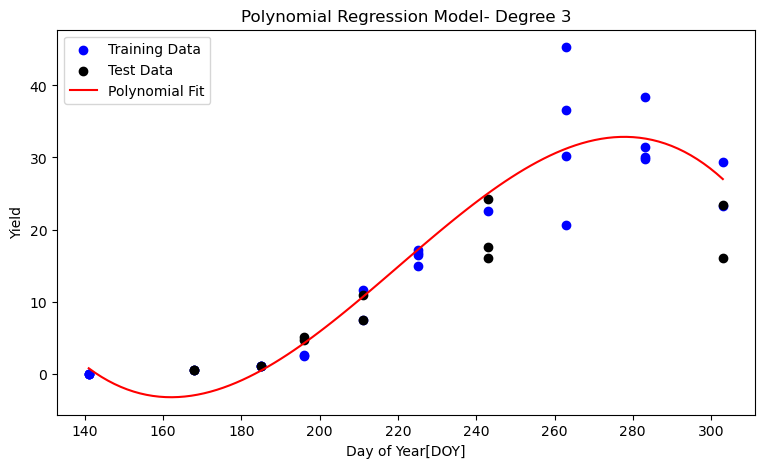

Polynomial Regreesion Degree: 4
Polynomial Regression: R-squared: 0.7345729869019135
Polynomial Regression: RMSE: 4.273356180686332
Polynomial Regression: MAE: 2.9167928783873087


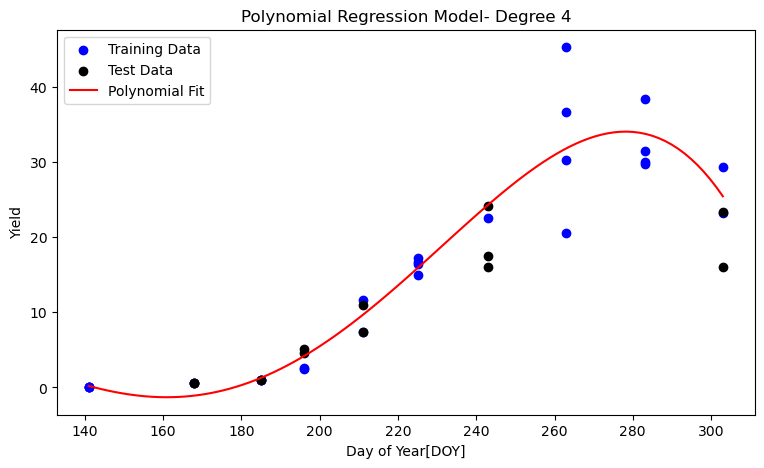

Polynomial Regreesion Degree: 5
Polynomial Regression: R-squared: 0.6626087042249217
Polynomial Regression: RMSE: 4.817963100908426
Polynomial Regression: MAE: 3.2375060711297614


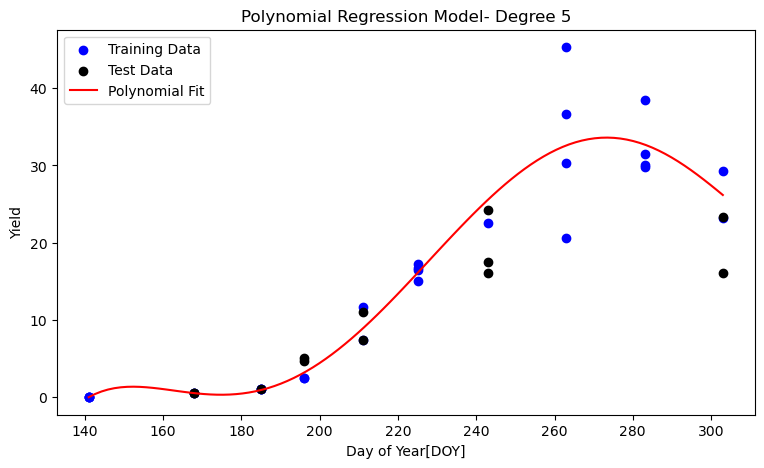

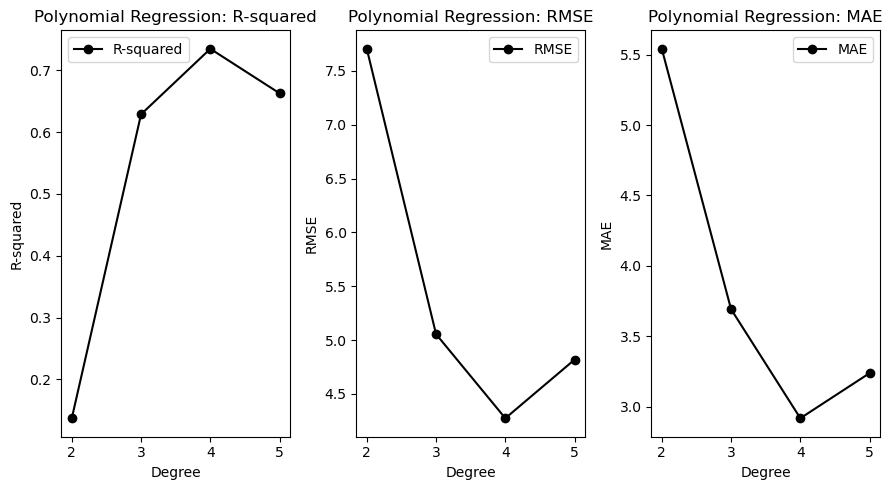

In [12]:
#initializing lists to store degree and metrics for each degree in the model
degree_value = []
r2_value = []
rmse_value = []
mae_value = []

for degree in range(2,6):
    poly_reg = PolynomialFeatures(degree=degree)       #initializing polynomial features to prepare data for polynomial regression model
    poly_x_train = poly_reg.fit_transform(x_train)     #transforming x_train data to polynomial feature 
    poly_x_test = poly_reg.transform(x_test)           #transforming x_test data to polynomial feature

    #Applying and fitting linear regression model to polynomial features for polynomial regression
    poly_reg_model = linear_model.LinearRegression()   
    poly_reg_model.fit(poly_x_train, y_train)
    
    #Making prediction based on test feature dataset(poly_x_test)
    poly_predicted_y = poly_reg_model.predict(poly_x_test)

    #Calculating MSE and RMSE
    poly_mse = np.mean((y_test - poly_predicted_y)**2)
    poly_rmse = np.sqrt(poly_mse)

    #Calculating MAE
    poly_mae = np.mean(np.abs(y_test - poly_predicted_y))
    
    #Calculating R-squared
    rss1 = np.sum((y_test - poly_predicted_y)**2)       #calculating Residual Sum Squared(RSS)
    tss1 = np.sum((y_test - np.mean(y_test))**2)        #calculating Total Sum Squared(TSS)
    poly_r2 = 1 - (rss1/tss1)

    print("Polynomial Regreesion Degree:", degree)
    print("Polynomial Regression: R-squared:", poly_r2)
    print("Polynomial Regression: RMSE:", poly_rmse)
    print("Polynomial Regression: MAE:", poly_mae)

    # Storing data for visualization
    degree_value.append(degree)
    r2_value.append(poly_r2)
    rmse_value.append(poly_rmse)
    mae_value.append(poly_mae)
    
    
    #Visualizing Polynomial Regression Model Fit
    figure, ax = plt.subplots(figsize=(9,5))
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
    poly_x_range = poly_reg.transform(x_range)
    poly_y_range = poly_reg_model.predict(poly_x_range)
    ax.scatter(x_train, y_train, color='blue', label='Training Data')
    ax.scatter(x_test, y_test, color='black', label='Test Data')
    ax.plot(x_range, poly_y_range, color='red', label=f'Polynomial Fit')
    ax.set_xlabel('Day of Year[DOY]')
    ax.set_ylabel('Yield')
    ax.set_title(f'Polynomial Regression Model- Degree {degree}')
    ax.legend()
    plt.show()

#Visualizing the metrics used to evaluate the performance of polynomial regression model using line chart
#Visualizing R-squared 
figure, ax = plt.subplots(1, 3, figsize=(9,5))
ax[0].plot(degree_value, r2_value, marker='o', linestyle='-', color='black', label='R-squared')
ax[0].set_title('Polynomial Regression: R-squared')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('R-squared')
ax[0].legend()

#Visualizing RMSE
ax[1].plot(degree_value, rmse_value, marker='o', linestyle='-', color='black', label='RMSE')
ax[1].set_title('Polynomial Regression: RMSE')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('RMSE')
ax[1].legend()

#Visualizing MAE
ax[2].plot(degree_value, mae_value, marker='o', linestyle='-', color='black', label='MAE')
ax[2].set_title('Polynomial Regression: MAE')
ax[2].set_xlabel('Degree')
ax[2].set_ylabel('MAE')
ax[2].legend()

plt.tight_layout()
plt.show() 

### 1.3 Metrics used to evaluate the performance of the models


The metrics used to evaluate the performance of both linear and polynomial regression models on data not used in training are R-squared, Root Mean Squared Error(RMSE), and Mean Absolute Error(MAE). R-squared measures the overall fit of the model. It determines how effectively the model explains the variability in the dependent variable. The value of R-squared ranges from 0 to 1, where 1 means the model can perfectly predict the output(dependent variable) based on input(independent variable) and 0 means the model absolutely cannot predict the output/target variable based on the input variables. Root Mean Squared Error(RMSE) measures the error in model prediction. It provides the measure of how far off the model predictions are from the actual value by focusing on larger errors as it squares them before calculating their average. A lower RMSE value indicates better model prediction and performance. Mean Absolute Error(MAE) provides an overall measure of how accurately the model predicts the output. It treats all errors equally and calculates their absolute value. A lower MAE value also indicates better model prediction and performance. These three metrics provide a comprehensive evaluation of the performance of both the linear and polynomial regression models, including the overall fit of the models, a general measure of errors in predictions, and sensitivity to large deviation. 

### 1.4 Performance Evaluation of the Regression Models

Linear Regression Model: The linear regression model has an R-squared value of 0.1851 which is relatively low. This indicates that the model is able to capture only 18.5% of the variability in the dependent variable, which suggests the model does not effectively capture the true relationship between the independent and dependent variables. Furthermore, the RMSE and MAE values for the model are 7.4873 and 5.610 respectively. These high error values represent that the model's predictions are significantly different from the actual values on average. The model most likely underfits the data, meaning it is too simple to adequately capture the underlying patterns and relations in the data.

Polynomial Regression Degree 2: The polynomial regression with degree 2 performs similarly to the linear regression model but with an even lower R-squared value of 0.1372. The RMSE and MAE values of the model are 7.7045 and 5.5416 respectively which is also identical to the linear regression model. The low R-squared value and high RMSE and MAE values show that the polynomial model with degree 2 also fails to effectively improve the fit of the model, capture the relationships in the input-output data, and reduce prediction errors. Thus, this model also seems to underfit the data.

Polynomial Regression Degree 3: With an R-squared value of 0.6287, RMSE value of 5.054, and MAE value of 3.6916, the polynomial regression model with degree 3 performs considerably better than the previous models. The R-squared value indicates that the model is able to capture 62.87% of the variability in the dependent variable. Moreover, the lower RMSE and MAE values signify that the model's predictions are more accurate. Here, the polynomial model with degree 3 does not seem to be underfitting or overfitting the data and is adequately fitting and capturing true relationships in the data. However, the R-squared value can be improved further.

Polynomial Regression Degree 4: The polynomial regression degree 4 has the R-squared value of 0.7346, which means the model captured approximately 73% of the variability in the dependent variable. The RMSE and MAE further decrease to 4.2734 and 2.9168 respectively, indicating better model performance. This shows that the polynomial model with degree 4 effectively fits the data as well as captures the relationships in the data with minimal errors. The model appears to be well-fitted neither overfitting nor underfitting the data.

Polynomial Regression Degree 5: The R-squared value of the polynomial model with degree 5 is 0.6626 and the RMSE and MAE values are 4.8180 and 3.2375. The model performance has slightly decreased compared to the degree 4 model. The increase in prediction errors (RMSE and MAE value) indicates that the model appears to be overfitting the data, even though the R-squared value is still rather high. This might be because the model is capturing noise in the data, resulting in poorer performance on new, unseen data.

## Task 2: Classification(Logistic Regression)

### 2.1 Logistic Regression

In [20]:
#importing necessary library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve

In [22]:
#loading the dataset with panda
atlas = pd.read_csv('ATLAS.csv') 
atlas.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Signal
0,243.128,96.455,158.618,90.253,0.693,56.238,1.581,3.615,13.597,264.586,...,2.121,376.410,46.248,-0.958,-0.444,42.759,-1.651,-1.445,157.638,0
1,139.751,74.028,111.619,44.266,2.119,104.723,-0.498,2.533,9.437,168.638,...,0.447,252.698,36.798,0.269,-1.254,31.816,-1.849,0.664,68.614,0
2,116.217,73.136,59.239,101.850,0.625,85.539,2.979,1.922,28.049,202.636,...,1.816,271.485,82.453,2.066,-1.210,58.216,1.442,-2.288,140.669,0
3,64.544,0.099,28.945,341.418,2.390,358.936,-1.181,0.714,35.293,508.349,...,-2.409,470.806,331.152,-1.693,0.615,41.742,0.697,1.083,409.977,0
4,32.281,67.393,26.006,29.088,1.330,108.191,-0.362,0.846,48.389,152.087,...,-1.421,244.220,48.198,0.949,1.517,40.382,-0.382,-2.029,88.580,0


In [24]:
#separating feature(input) variable and target(output) variable 
atlas_x = atlas.drop('Signal', axis =1)    #feature variable: V1 to V29
atlas_y = atlas['Signal']                  #target variable: Signal               
print(atlas['Signal'].unique())            #verifying that the Signal has two distinct values         

#Splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(atlas_x, atlas_y, test_size=0.3, random_state=42)

[0 1]


Confusion Matrix:
 [[1210  331]
 [ 515  944]]


Model Accuracy =  0.718

Class Precision Recall F1
    0     0.701  0.785 0.741
    1     0.740  0.647 0.691


Total Precision =  0.720920716112532
Total Recall =  0.7161114592724609
Total F1 =  0.7157654108231335


ROC AUC = 0.79


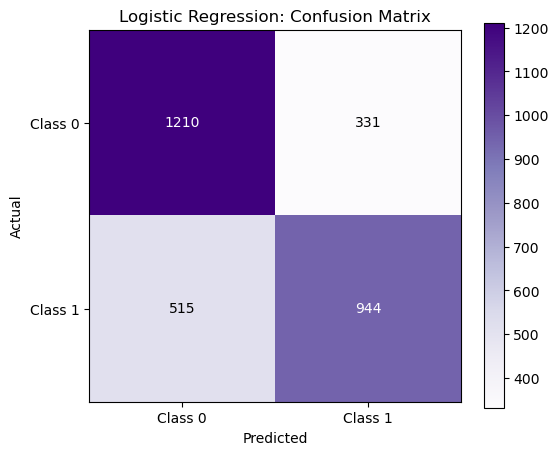

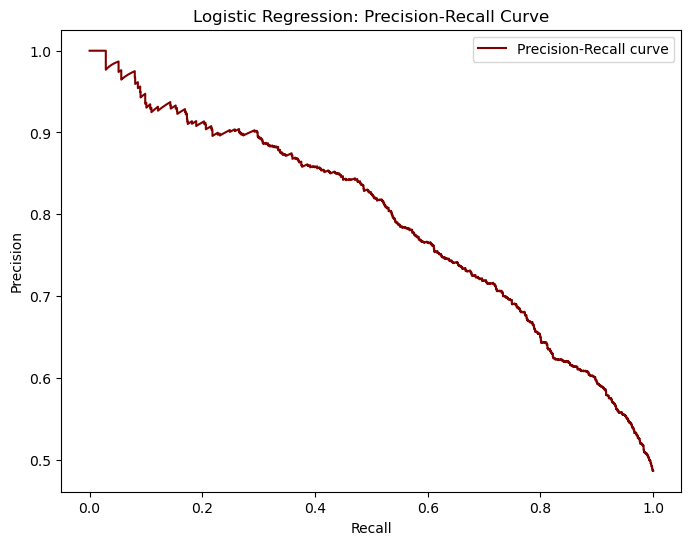

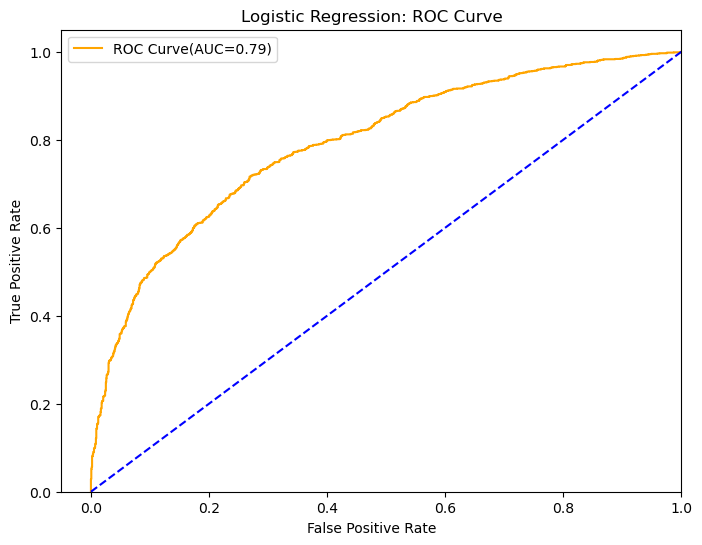

In [26]:
#Logistic Regression
log_reg = LogisticRegression(max_iter=10000, random_state=42)          #initializing logistic regression with a maximum of 10,000 iterations
log_reg.fit(x_train, y_train)                     #training the model using train dataset         
z = log_reg.predict(x_test)                       #making predictions based on test feature dataset(x_test)
prob_y = log_reg.predict_proba(x_test) [:,1]      #calculating probabilty estimates for Signal(class 1) class 


#Confusion matrix to calculate precision and recall
cm = confusion_matrix(y_test, z)
print('Confusion Matrix:\n', cm)
print('\n')

#Calculating accuracy, precision, recall, f1 score and macro average of precision, recall and f1 
model_accuracy= log_reg.score(x_test, y_test)    

def precision(label, cm):
    column = cm[:, label]
    return cm[label, label]/column.sum()

def recall(label, cm):
    row = cm[label, :]
    return cm[label, label]/row.sum()

def f1_score(label, cm):
    p = precision(label, cm)
    r = recall(label, cm)
    return 2*(p*r)/(p+r) if (p+r) > 0 else 0

def precision_macro_average(cm):
    rows, columns = cm.shape
    precision_sum = 0
    for label in range(rows):
        precision_sum+= precision(label, cm)
    return precision_sum/rows

def recall_macro_average(cm):
    rows, columns = cm.shape
    recall_sum = 0
    for label in range(columns):
        recall_sum+= recall(label, cm)
    return recall_sum/columns

def f1_macro_average(cm):
    rows = cm.shape[0]  
    f1_sum = 0
    for label in range(rows):
        f1_sum+= f1_score(label,cm)
    return f1_sum/rows

print('Model Accuracy = ', model_accuracy)
print('\nClass Precision Recall F1')
for label in range(cm.shape[0]):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f} {f1_score(label, cm):4.3f}")

print('\n')

#Printing the macro average of precision, recall and f1 
print('Total Precision = ', precision_macro_average(cm))
print('Total Recall = ', recall_macro_average(cm))
print('Total F1 = ', f1_macro_average(cm))
print('\n')

#Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, prob_y)
a = auc(fpr,tpr)
print(f'ROC AUC = {a:.2f}')


#Visualizing Confusion Matrix
figure, ax = plt.subplots(figsize=(6,5))
cm_fig = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
figure.colorbar(cm_fig)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.set_yticklabels(['Class 0', 'Class 1'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, f'{cm[i,j]}', ha='center', va='center', color='white' if cm[i,j] > cm.max() /2 else 'black')

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()


#Visualizing precision-recall curve
p_value, r_value, _ = precision_recall_curve(y_test, prob_y)
plt.figure(figsize=(8, 6))
plt.plot(r_value, p_value, color='maroon', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression: Precision-Recall Curve')
plt.legend()
plt.show()


#Visualizing ROC curve and AUC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve(AUC={a:.2f})')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'b--')
plt.xlim(-0.05,1)
plt.ylim(0,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression: ROC Curve')
plt.legend()
plt.show()

### 2.2 Performance Evaluation of the Classfication Model

The metrics used to evaluate the logistic regression model's performance are accuracy, precision, recall, f1 score, macro averages, receiver operating characteristic (ROC), and Area under the curve(AUC). The accuracy score of the model is 71.8% indicating that the model classified almost 71% of the data correctly. 

The precision score for class 0(Not Signal) is 0.701, meaning that out of all times that the model classified a data point as class 0, 70.1% of them were correct.  The precision for class 1(Signal) is 0.740, meaning that out of all the times that the model classified a data point as class 1, 74% of them were correct.  In this case, the model seems to have predicted fewer false positives for class 1 compared to class 0. The recall score for class 0 is 0.785, which means that 78.5% of all actual 'Not Signal' instances were correctly classified as class 0 by the model. The recall value for class 1 is 0.647, which means that 64.7% of all actual 'Signal' instances were correctly classified as class 1 by the model. Here, the higher recall value in class 0 signifies that the model predicted fewer false negatives for class 0 in comparison to class 1.

The F1 scores for class 0 and class 1 are 0.741 and 0.691 respectively. The F1 score combines precision and recall values into a single value, providing a balance between them. Here, class 0 has a higher F1 score compared to class 1, indicating a better balance in precision and recall. 

The macro averages of the precision(72.1%), recall(71.6%), and F1(71.5%) scores give a general overview of how well the model is able to balance prediction for both classes. As these values are close to accuracy as well, the model seems to perform consistently across both classes. The ROC AUC value for the model is 0.79, representing the model can efficiently distinguish between the two classes.

Amongst all metrics, the F1 score and ROC AUC may be the two most important metrics for evaluating the logistic regression model performance as F1 helps understand the balance between precision and recall and takes both false negative and false positive into account. ROC AUC is a reliable measure, especially for binary classification to measure the model's overall ability to distinguish classes at different thresholds.  
